### 1. Análisis Exploratorio de Datos (EDA)

In [3]:
!pip install scikit-learn

  Using cached scikit_learn-1.6.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.6.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.5 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.7/37.7 MB 9.1 MB/s eta 0:00:0000:01:00:01
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn] [scikit-learn]


In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


- [ ] Estadísticas descriptivas y visualización de variables
importantacion de 

In [ ]:
df = pd.read_csv('./data/credit_card_transactions.csv', encoding='latin1') 
print(df.shape)
df.head()

(10000, 11)


,TransactionID,Time,Amount,CardholderName,MerchantName,MCC,Location,Device,IPAddress,TransactionSpeed,Fraud
0,1,2025-03-09 06:23:57,83.54,Sarah Murray,Oconnor-Hughes,5411,Longtown,Android,102.247.49.50,38.17,0
1,2,2025-02-14 05:17:36,805.88,Alexander Brooks,Reed PLC,5261,Woodsland,POS,153.157.50.7,49.84,0
2,3,2024-05-03 15:28:52,450.49,Harold Perez,Berry LLC,5261,Jessicatown,iOS,151.174.154.123,48.79,0
3,4,2024-05-03 09:01:14,782.39,Rebecca Davis,Berg Inc,5968,North Krystalburgh,Android,130.70.79.149,8.71,0
4,5,2025-04-24 17:24:39,713.02,Lauren Benson DDS,King-Gaines,5968,East Danielletown,Android,195.136.16.190,17.16,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TransactionID     10000 non-null  int64  
 1   Time              10000 non-null  object 
 2   Amount            10000 non-null  float64
 3   CardholderName    10000 non-null  object 
 4   MerchantName      10000 non-null  object 
 5   MCC               10000 non-null  int64  
 6   Location          10000 non-null  object 
 7   Device            10000 non-null  object 
 8   IPAddress         10000 non-null  object 
 9   TransactionSpeed  10000 non-null  float64
 10  Fraud             10000 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 859.5+ KB


In [38]:
df.describe().drop(columns=['TransactionID'])

,Amount,MCC,TransactionSpeed,Fraud
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,547.347491,5950.102900,30.738446,0.019200
std,460.047329,664.526287,19.092345,0.137234
min,10.090000,5261.000000,0.110000,0.000000
25%,263.222500,5411.000000,14.910000,0.000000
50%,512.240000,5812.000000,29.655000,0.000000
75%,759.935000,5968.000000,45.270000,0.000000
max,4988.070000,7299.000000,119.860000,1.000000


In [35]:
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns = df.select_dtypes(exclude=[np.number]).columns.tolist()
numeric_columns.remove('TransactionID')
numeric_columns.remove('Fraud')

categorical_columns.append('MCC')
categorical_columns.append('Fraud')

print(f'numeric_columns: {numeric_columns}')
print(f'categorical_columns: {categorical_columns}')


numeric_columns: ['Amount', 'MCC', 'TransactionSpeed']
categorical_columns: ['Time', 'CardholderName', 'MerchantName', 'Location', 'Device', 'IPAddress', 'MCC', 'Fraud']


In [52]:
for col in categorical_columns:
    print(f'Valores unicos en {col}: {df[col].nunique()}')

Valores unicos en Time: 10000
Valores unicos en CardholderName: 9439
Valores unicos en MerchantName: 8677
Valores unicos en Location: 7697
Valores unicos en Device: 4
Valores unicos en IPAddress: 10000
Valores unicos en MCC: 6
Valores unicos en Fraud: 2


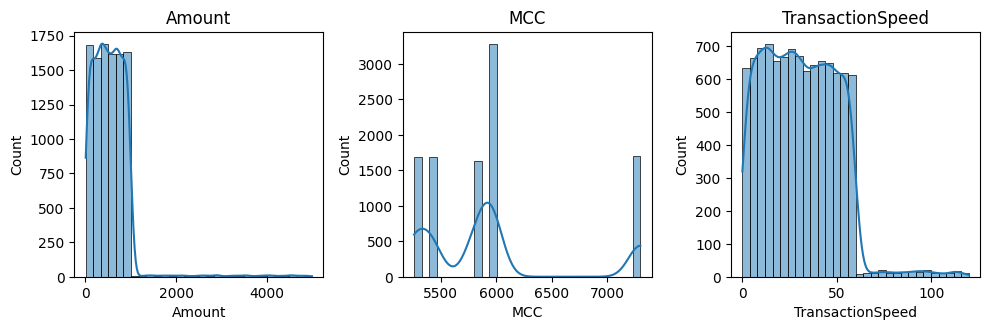

In [22]:
# histograms
plt.figure(figsize=(10, 6))
for col in numeric_columns:
    plt.subplot(2, 3, numeric_columns.index(col) + 1)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(col)
plt.tight_layout()

In [ ]:
# boxplots
numeric_columns.remove('MCC')

ValueError: list.remove(x): x not in list

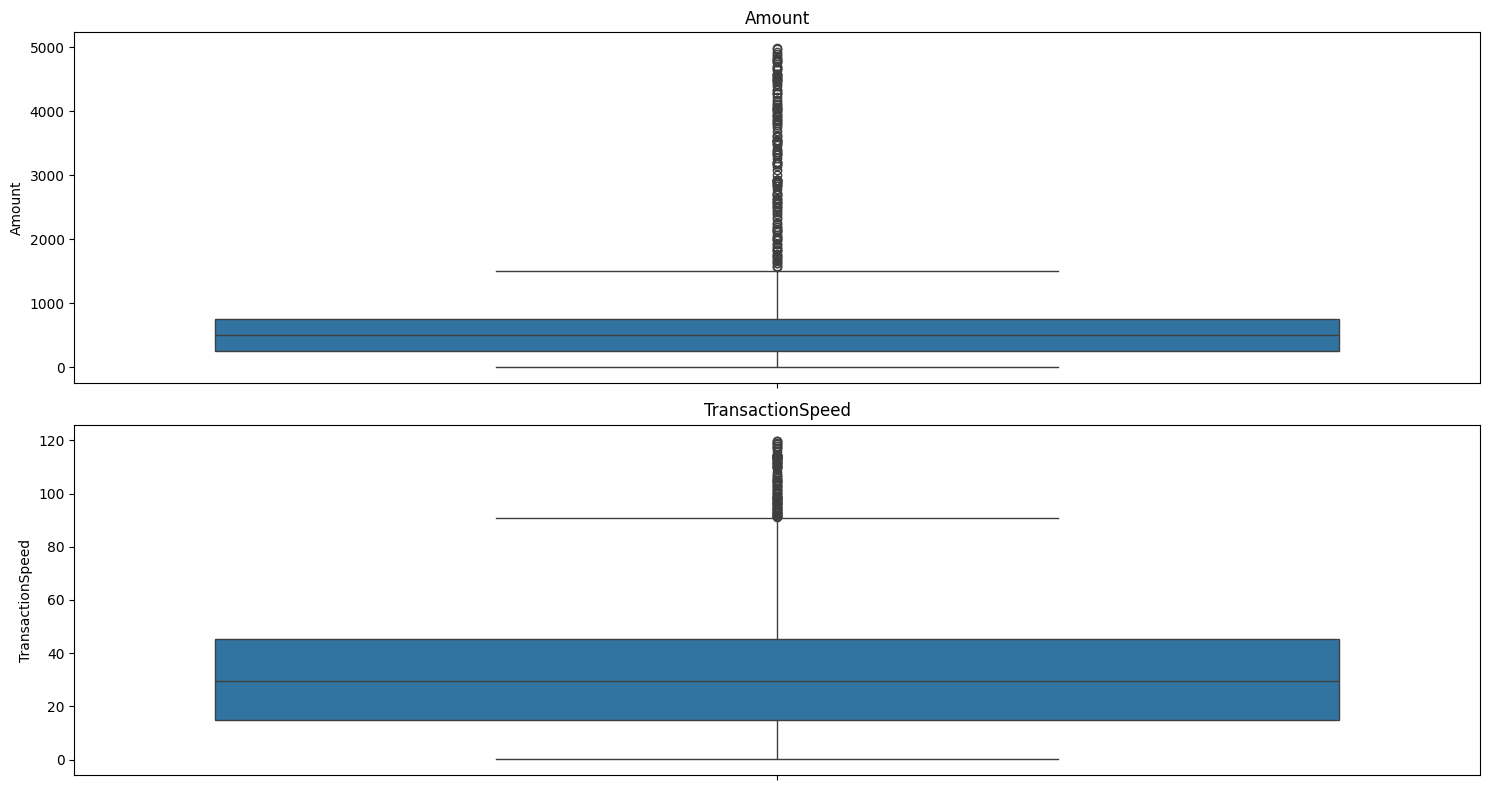

In [29]:


#boxplot por variable

plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_columns):
    plt.subplot(2, (len(numeric_columns)+1)//2, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

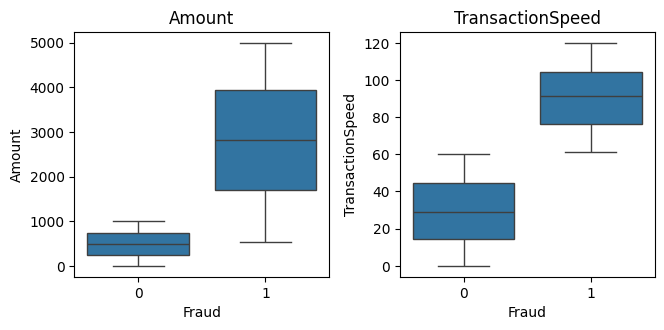

In [30]:

plt.figure(figsize=(10, 6))
for col in numeric_columns:
    plt.subplot(2, 3, numeric_columns.index(col) + 1)
    sns.boxplot(x='Fraud', y=col, data=df)
    plt.title(col)
plt.tight_layout()


- [ ] Identificación y tratamiento de valores atípicos y faltantes

In [39]:
df.isnull().sum()

TransactionID       0
Time                0
Amount              0
CardholderName      0
MerchantName        0
MCC                 0
Location            0
Device              0
IPAddress           0
TransactionSpeed    0
Fraud               0
dtype: int64

In [46]:
# revisar duplicados sin considerar ID
df.T[1:].T.duplicated().sum()

np.int64(0)

In [47]:
# ID duplicado
df.TransactionID.duplicated().sum()

np.int64(0)


- [ ] Análisis de la variable objetivo (`Fraud`) y balance de clases

Time: 10000

CardholderName: 9439

MerchantName: 8677

Location: 7697

Device: 4

IPAddress: 10000

MCC: 6

Fraud: 2

